**Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

**Importing the dataset**

In [2]:
dataset=pd.read_csv('twitter_training.csv')

**Removing the Quotes**

In [4]:
dataset.iloc[:,3]=dataset.iloc[:,3].replace('"','')

**Decoding the Dataset**

In [5]:
dataset.head()

,Tweet_ID,entity,sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
dataset.columns

Index(['Tweet_ID', 'entity', 'sentiment', 'Tweet_content'], dtype='object')

In [7]:
dataset.describe()

,Tweet_ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   Tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


**Checking for missing values**

In [9]:
dataset.isnull().sum()

Tweet_ID           0
entity             0
sentiment          0
Tweet_content    686
dtype: int64

**Handling Missing Values**

In [10]:
dataset=dataset.dropna(subset=['Tweet_content'])

**Exploring the Sentiment Column**

In [11]:
dataset['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

Insights : There are 4 different sentiments predicted based on the tweet contents

**Plotting the Sentiment count**

In [12]:
sentiment_count=dataset.groupby('sentiment').count()
sentiment_labels=dataset['sentiment'].unique()

([<matplotlib.patches.Wedge at 0x7d253643cc40>,
 [Text(0.9397125449429853, 0.5717869645915147, 'Positive'),
  Text(-0.4998306282508549, 0.9798823108222516, 'Neutral'),
  Text(-0.8959514158051299, -0.6381779223044177, 'Negative'),
  Text(0.7034625514597657, -0.845659765327473, 'Irrelevant')],
 [Text(0.5125704790598101, 0.3118837988680989, '17.4%'),
  Text(-0.2726348881368299, 0.5344812604485009, '30.2%'),
  Text(-0.48870077225734354, -0.3480970485296823, '24.5%'),
  Text(0.3837068462507813, -0.46126896290589425, '27.9%')])

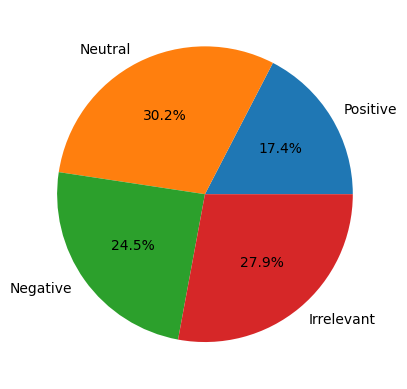

In [13]:
plt.pie(sentiment_count['Tweet_ID'],labels=sentiment_labels,autopct='%1.1f%%')

Insights :

1) Negative tweets are highest in count

2)Irrelevant tweet are least in count

3) Neutral and Positive lie in between

**Exploring the entity Column**

In [14]:
dataset['entity'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

**Plotting the entity column count**

In [15]:
entity_count=dataset.groupby('entity').count()
entity_labels=dataset['entity'].unique()

([<matplotlib.patches.Wedge at 0x7d253616ec20>,
 [Text(1.0948684032521923, 0.10612812803397265, 'Borderlands'),
  Text(1.0530689037758008, 0.3178771522151811, 'CallOfDutyBlackopsColdWar'),
  Text(0.9716474273409434, 0.5156561615473301, 'Amazon'),
  Text(0.8545803032582614, 0.6925983722786375, 'Overwatch'),
  Text(0.7040726795500734, 0.8451518573080108, 'Xbox(Xseries)'),
  Text(0.5281536430873391, 0.964911254620637, 'NBA2K'),
  Text(0.3281895701622058, 1.0499007600896129, 'Dota2'),
  Text(0.11268043834775995, 1.0942134704040876, 'PlayStation5(PS5)'),
  Text(-0.10203678888025981, 1.0952572728427807, 'WorldOfCraft'),
  Text(-0.3135824183815083, 1.0543557591638626, 'CS-GO'),
  Text(-0.51565616154733, 0.9716474273409436, 'Google'),
  Text(-0.6975211936758655, 0.8505669781816103, 'AssassinsCreed'),
  Text(-0.849648205809449, 0.6986400549387247, 'ApexLegends'),
  Text(-0.9673673102645425, 0.523641563506512, 'LeagueOfLegends'),
  Text(-1.0501373654618278, 0.32743169312223214, 'Fortnite'),
  Te

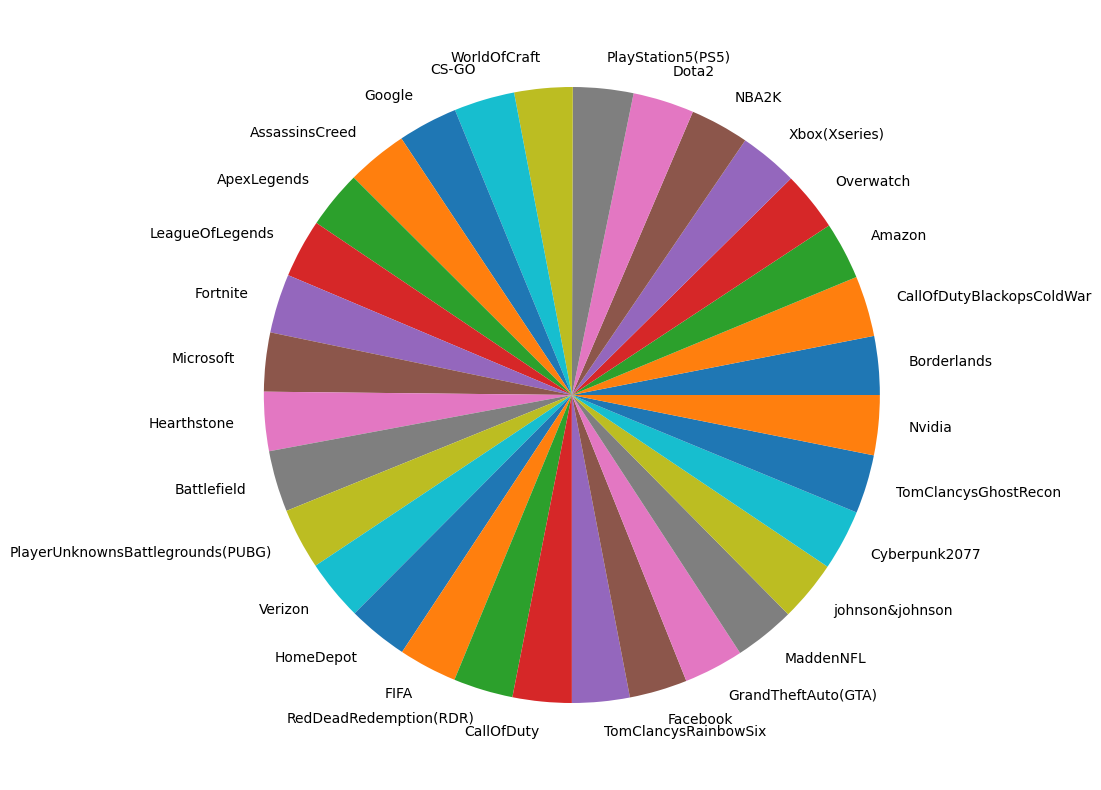

In [16]:
plt.figure(figsize=(10, 10))
plt.pie(entity_count['Tweet_ID'],labels=entity_labels)

Insights : It seems like all the entity have almost equal weight in the dataset

**Removing the Unneccesary Feature**

The tweet ID plays no role here so it is better having it removed

In [17]:
dataset=dataset.drop('Tweet_ID',axis=1)

**Applying NLP**

**Cleaning the Dataset**

Cleaning the Training set

In [19]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 73996):
  review = re.sub('[^a-zA-Z]', ' ', dataset.iloc[i,2])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
print(corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



**Creating Bag of Words Model**

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X= cv.fit_transform(corpus).toarray()
Y=dataset.iloc[:,1]

**Encoding the target feature**

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)

**Splitting into training and test set**

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

**Training the Naive Bayes model on training set**

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=300,criterion='entropy',random_state=0)
classifier.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=0)

In [25]:
Y_pred = classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[1 1]
 [1 1]
 [2 2]
 ...
 [3 3]
 [1 1]
 [1 3]]


In [26]:
print(Y_pred)

[1 1 2 ... 3 1 1]


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[3165  216  122  406]
 [  88 5941  172  443]
 [ 113  233 4596  477]
 [ 153  239  162 5673]]


0.8727870624802919